<a href="https://colab.research.google.com/github/lingchm/Machine-Learning-Base/blob/master/mini-problems/survival%20analysis/survival_analysis_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Survival Analysis Tutorial**

The purpose of this notebook is to introduce the Kaplan Meier Method & Cox - Proportional Hazard with the lifelines package. 

# **1. Kaplan-Meier Estimation**


Dog Life Expectancy\
Let's start by making our own data frame for a hypothetical example. Let's say we have a dataset of 12 dogs and we want to analyze their life expectancies. The necessary columns are the age (in years) of each dog and whether ot not the dog has passed (as the event).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dog_life = pd.DataFrame()

dog_life['duration'] = 2,4,5,7,8,3,6,8,4,10,5,13
dog_life['event'] = 0,1,0,1,0,0,1,0,0,0,1,0

dog_life

,duration,event
0,2,0
1,4,1
2,5,0
3,7,1
4,8,0
5,3,0
6,6,1
7,8,0
8,4,0
9,10,0


This DataFrame contains one row for each dog and two columns:

durarion: age in years

event: 1 for dogs that passed; 0 for dogs that have not passed

Lifelines\
We will be using the lifelines package. \
lifelines is a complete survival analysis library, written in pure Python.\
See the official documentation here: https://lifelines.readthedocs.io/en/latest/

In [ ]:
#install lifelines

!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Let's import the package for KMF
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [ ]:
T = dog_life['duration']
E = dog_life['event']

In [ ]:
# Let's fit the model 
kmf.fit(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 12 total observations, 8 right-censored observations>

Lifelines includes several functions for understanding your dataset.
`survival_function_` organizes your data set by time and survival function  estimate at each time. Notice that at time 0 the survival is 100%.



In [ ]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.00000
2.0,1.00000
3.0,1.00000
4.0,0.90000
5.0,0.78750
6.0,0.65625
7.0,0.52500
8.0,0.52500
10.0,0.52500


The package also contains the upper and lower confidence intervals. This can be used to explain certainty. 

In [ ]:
ci = kmf.confidence_interval_survival_function_
ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
2.0,1.000000,1.000000
3.0,1.000000,1.000000
4.0,0.473009,0.985281
5.0,0.380882,0.942591
6.0,0.260390,0.876468
7.0,0.167675,0.792544
8.0,0.167675,0.792544
10.0,0.167675,0.792544
13.0,0.167675,0.792544


The `event_table` function outputs a summary of the life table. \
For every time, \


*   The number of subjects **removed**
*   The number of subjects **censored**, meaning the event has not occured for them however we don't have any information past this point
*   Number of subjects **entering** the study
*   Number of subjects **at risk** for having the event occur







In [ ]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,12,12
2.0,1,0,1,0,12
3.0,1,0,1,0,11
4.0,2,1,1,0,10
5.0,2,1,1,0,8
6.0,1,1,0,0,6
7.0,1,1,0,0,5
8.0,2,0,2,0,4
10.0,1,0,1,0,2


We can visualize this to show which subjects are being censored at each time point. 

[]

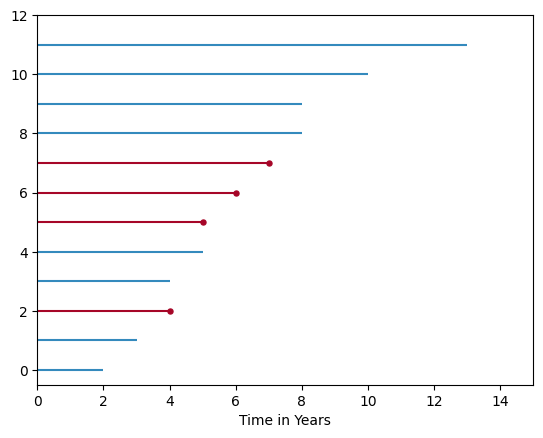

In [ ]:
import lifelines
ax = lifelines.plotting.plot_lifetimes(durations=T, event_observed=E)
ax.set_xlim(0, 15)
ax.set_xlabel("Time in Years")
plt.plot()

Finally, we can plot the survival probabilities as function of time to visually understand the dog life expectancy.

<Axes: xlabel='timeline'>

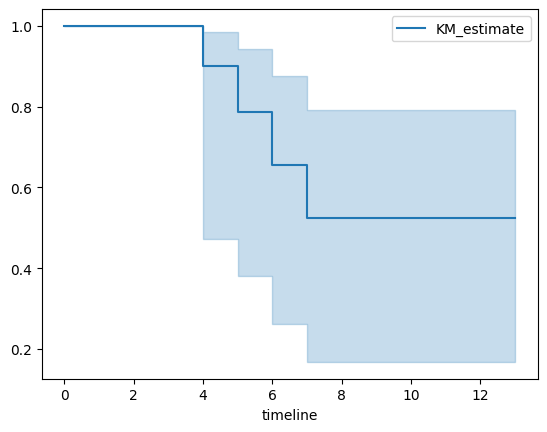

In [ ]:
kmf.plot()

In [ ]:
kmf.predict(5)

0.7875000000000001

<Axes: xlabel='timeline'>

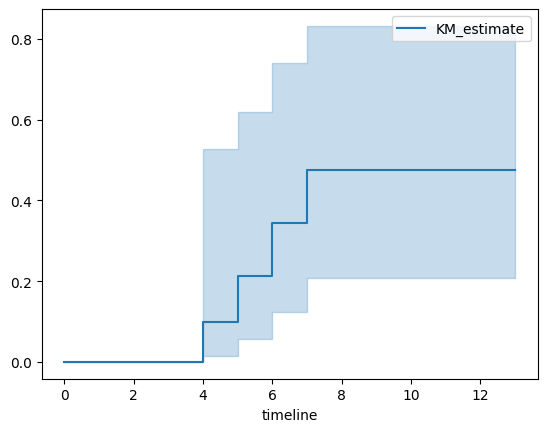

In [ ]:
# Let's plot the cumulative density function
kmf.plot_cumulative_density()

Notice that the Cumulative Density function is the inverse of the survival function plot. This answers "What is the likelihood of death?"


What if we wanted to compare the survival function across breeds?

In [ ]:
# Let's add a breed column to our dog_life dataframe
dog_life['breed'] = 'husky', 'poodle','husky', 'poodle','husky', 'poodle','husky', 'poodle','husky', 'poodle','husky', 'poodle'

dog_life

,duration,event,breed
0,2,0,husky
1,4,1,poodle
2,5,0,husky
3,7,1,poodle
4,8,0,husky
5,3,0,poodle
6,6,1,husky
7,8,0,poodle
8,4,0,husky
9,10,0,poodle


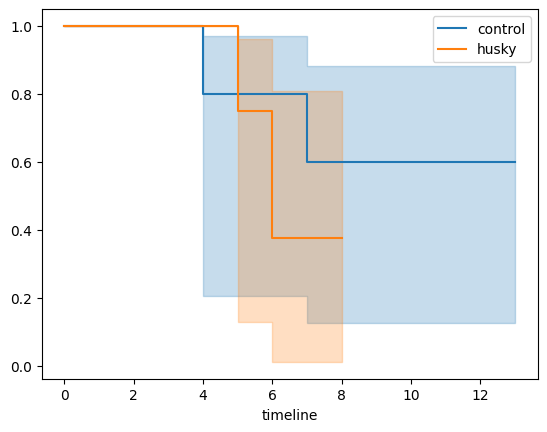

In [ ]:
groups = dog_life['breed']
ix = (groups == 'husky')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot_survival_function()

kmf.fit(T[ix], E[ix], label='husky')
ax = kmf.plot_survival_function(ax=ax)

With this view we are able to compare the survival function between breeds.

# **2. Cox - Hazard Model**

1. Fitting the Regression
2. Plotting the Coefficients
3. Plotting the effect of varying a covariate

Lifelines has a few datasets appropriate for survival analysis.

We will utilize the "rossi" dataset

The data set contains 432 convicts who were released from Maryland state prisons in the 1970s and who were followed up for one year after release. Half the released convicts were assigned at random to an experimental treatment in which they were given financial aid; half did not receive aid.



In [ ]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi = load_rossi()

In [ ]:
rossi.head()
# Column Descriptions:
# week: weeks after release
# arrest: 0,1 
# fin: binary whether or not they recieved financial aid
# age: at time of release
# race: 
# wexp: full time work experience before arrest (yes or no)
# mar: married or not
# paro: released on parole? yes or no
# prio: prior arrests

# In order to fit the cox proportinal hazard, we must One-Hot Encode the Categorical Variables

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [ ]:
# Fitting the regression

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

Next, we will plot the hazard ratios for each covariate.\ 

Rule: hazard ratio of 1 means lack of association, a hazard ratio greater than 1 suggests an increased risk, and a hazard ratio below 1 suggests a smaller risk

<Axes: xlabel='HR (95% CI)'>

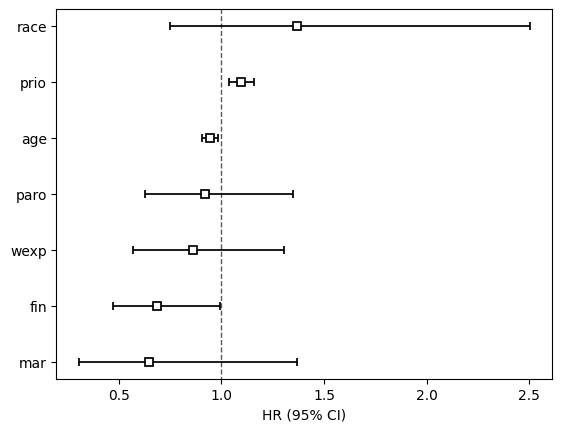

In [ ]:
cph.plot(hazard_ratios = True)

We can also look at the effect of varying a covariate. 



`plot_partial_effects_on_outcome` produces a plot comparing the baseline curve of the model versus what happens when a covariate(s) is varied over values in a group. This is useful to compare subjects’ survival as we vary covariate(s), all else being held equal.

<Axes: >

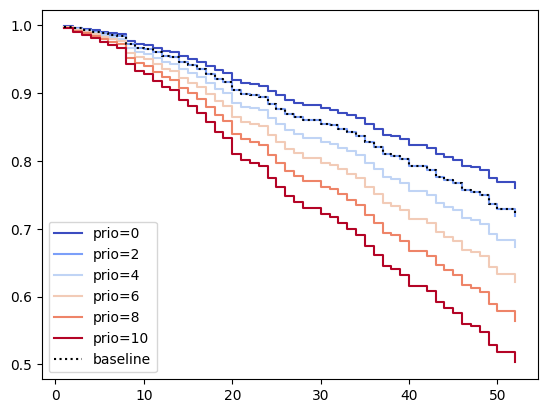

In [ ]:
# Let's look at how the survival function varies for the covariate 'prio'
# survival function being the liklihood of arrest, 'prio' being the number of prior arrests 

cph.plot_partial_effects_on_outcome(covariates='prio', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm')

Here we can see that the liklihood of not getting arrested at time t is greater for subjects with less prior arrests. Or as the 'prio' covariate increases, so does the likelihood of experiening and arrest.

# **3. Log-Rank Test**
A hypothesis test used to compare the survival distribution of 2 samples.
Null hypothesis being there is no significant difference between the samples. Can be thought of as a test of whether the survival curves are identical or overlapping or not.

Null hypothesis: Both groups have identical distribution curves.
Alternative hypothesis: Both groups have different distribution curves.


Answers the q: "Is the difference in survival between these 2 groups significant?"


In [ ]:
T1 = [1, 4, 10, 12, 12, 3, 5.4]
E1 = [1, 0, 1,  0,  1,  1, 1]

T2 = [4, 5, 7, 11, 14, 20, 8, 8]
E2 = [1, 1, 1, 1,  1,  1,  1, 1]

from lifelines.statistics import logrank_test
results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)

#results.print_summary()
print("p_value: ",results.p_value)      

p_value:  0.7676913033364599


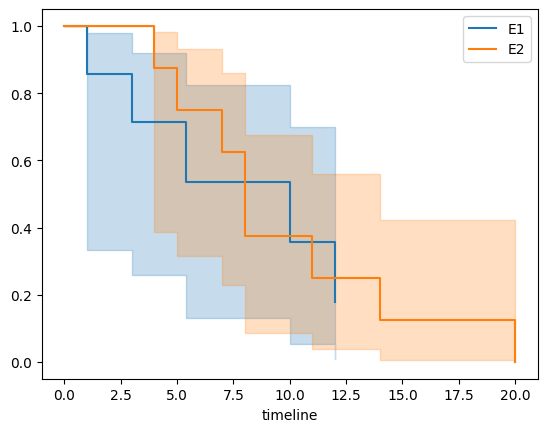

In [ ]:
kmf.fit(T1, E1, label='group_1')
ax = kmf.plot_survival_function()

kmf.fit(T2, E2, label='group_2')
ax = kmf.plot_survival_function(ax=ax)

The question is whether this p-value is greater than the significance level or not. Let's say the significance level is set to 0.05.

If the calculated p-value is greater than 0.05, the null hypothesis is retained. We can assume that both groups have the same distribution curve.

In [ ]:
T1 = [1, 1, 1, 1, 1, 1, 1]
E1 = [1, 0, 1,  0,  1,  1, 1]

T2 = [4, 5, 7, 11, 14, 20, 8, 8]
E2 = [1, 1, 1, 1,  1,  1,  1, 1]

from lifelines.statistics import logrank_test
results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)

#results.print_summary()
print("p_value: ",results.p_value)       

p_value:  0.004677734981047271


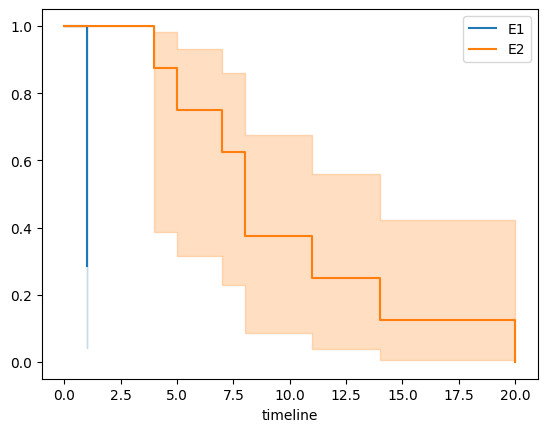

In [ ]:
kmf.fit(T1, E1, label='group_1')
ax = kmf.plot_survival_function()

kmf.fit(T2, E2, label='group_2')
ax = kmf.plot_survival_function(ax=ax)